<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/06_3_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원과 차원 축소


In [1]:
# 특성 : 데이터가 가진 속성
# 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 것
# 이런 특성을 '차원'이라고 부름
# 10,000개의 특성은 결국 10,000개의 차원이라는 것 --> 이를 줄이면 저장 공간을 크게 절약할 수 있음.

In [2]:
# 다차원 배열에서 차원은 배열의 축 개수
# 2차원 배열 차원 : 행 열
# 1차원 배열 차원 : 원소의 개수

# 주성분 분석 소개

In [3]:
# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해
# 분산은 데이터가 널리 퍼져있는 정도를 말함
# 분산이 큰 방향을 데이터로 잘 표현하는 벡터로 생각

In [4]:
# 분산이 큰 방향 직선 --> 주성분 벡터(원본 데이터에 있는 어떤 방향)

# 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음

# 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음.

# 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다!! 꼭 기억하기!!!

# 주성분이 가장 큰 분산이 큰 방향이기 때문에 주성분에 투영항 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타냄.

# 첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다.
# 그 벡터가 두번째 주성분

# 여기서는 2차원이기 떄문 두 번째 주성분의 방향은 하나뿐임.

# 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.

# PCA클래스

In [5]:
# 데이터셋 다운
!wget https://bit.ly/fruits_300 -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2023-08-02 11:06:06--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2023-08-02 11:06:06--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2023-08-02 11:06:07--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [7]:
# 주성분 분석 알고리즘

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d) # k-평균과 마찬가지로 비지도 학습이라 fit()메서드에 타깃값 제공 x

# PCA클래스가 찾은 주성분은 components_ 속성에 저장
# 이 배열의 크기 확인

print(pca.components_.shape)
# 두번째 차원은 항상 원본 데이터의 특성 개수와 같음

(50, 10000)


In [8]:
# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위한 함수 선언

import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr) # 샘플의 개수
  # 한 줄에 10개씩 이미지를 그림.
  # 샘플 개수를 10으로 나누어 전체 행 개수 파악
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플의 개수, 아니면 10개
  cols = n if rows <2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i *10 + j < n:
          axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()



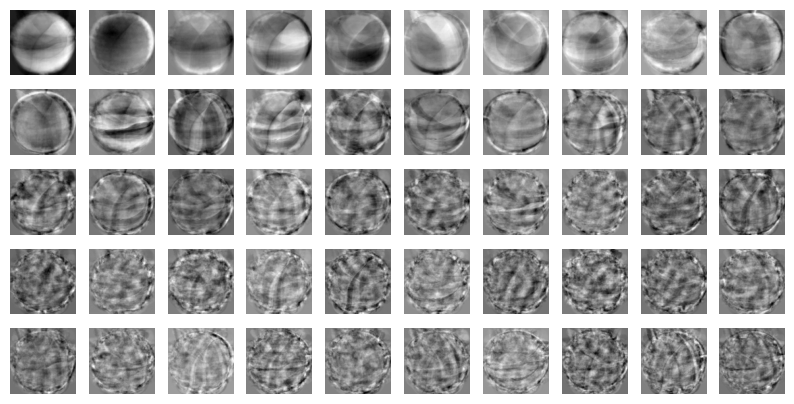

In [11]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [13]:
# 위 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음.

print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


# 원본 데이터 재구성

In [15]:
# 특성을 10,000에서 50개로 줄였으니 어느 정도 데이터 손실이 있다.
# but! 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터의 상당 부분 재구성 가능

# 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


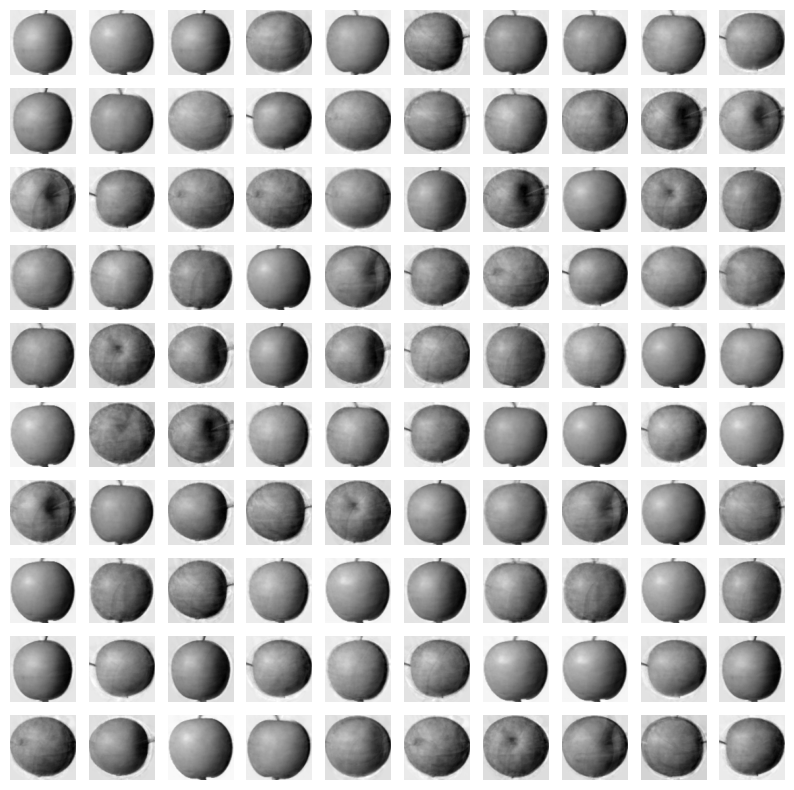

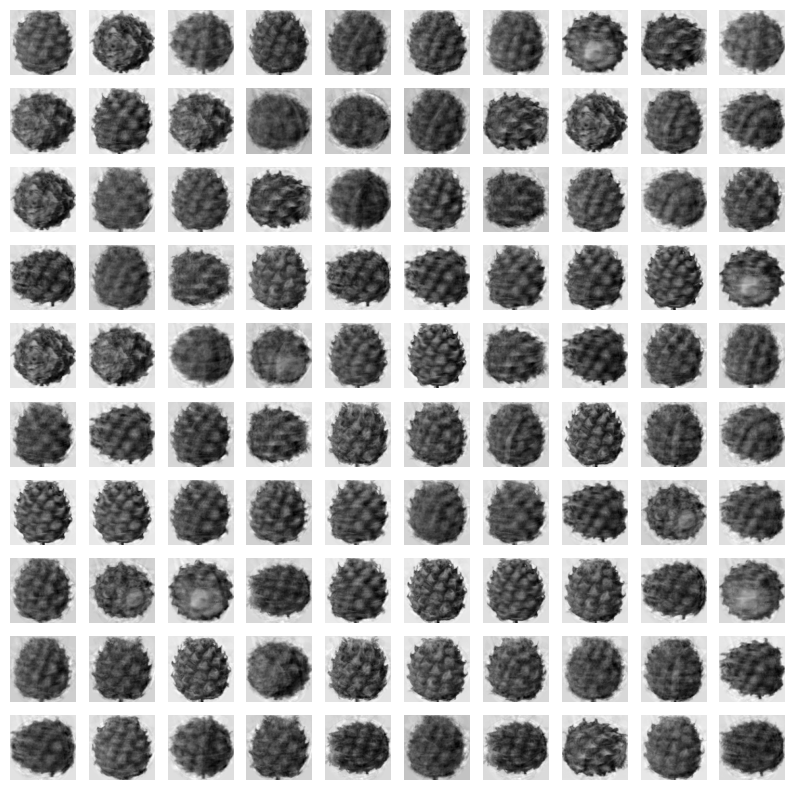

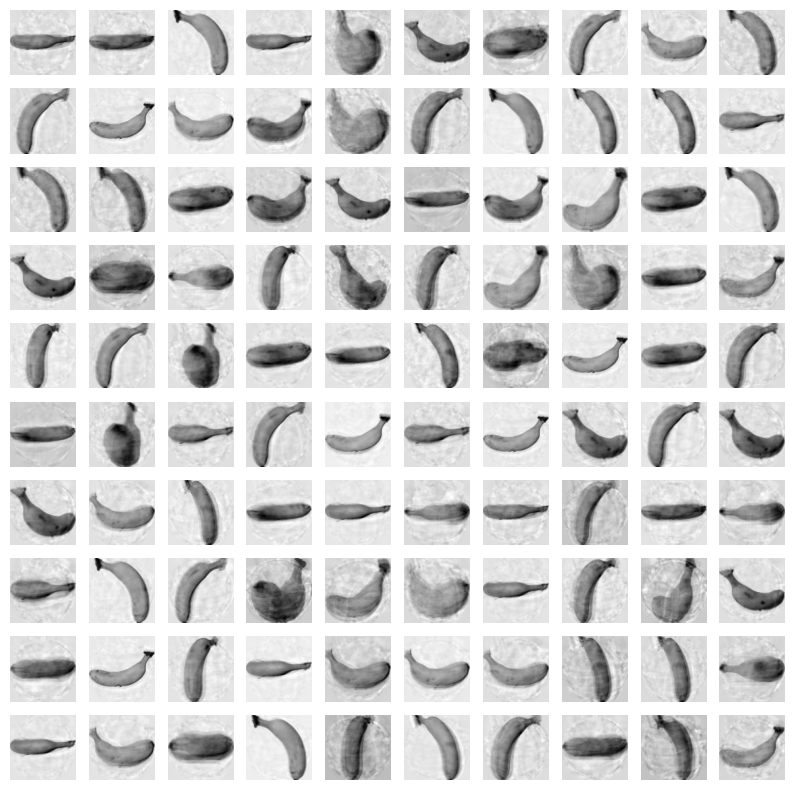

In [16]:
# 위 데이터 출력

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200] :
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [ ]:
# 불과 50개의 특성을 10,000개로 늘린 것 대~박
# 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성 가능!

# 설명된 분산

In [18]:
# 설명된 분산이란? 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

print(np.sum(pca.explained_variance_ratio_))

# 92% 정도 분산 유지

0.9215279214975143


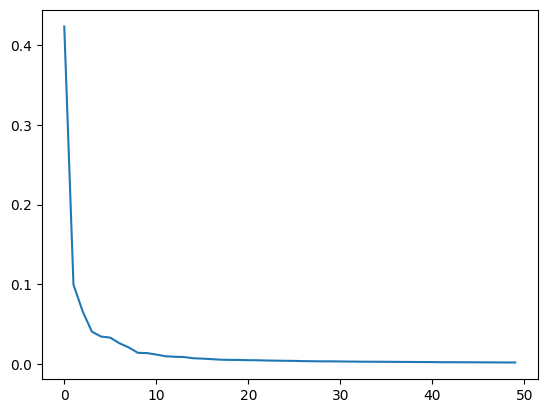

In [20]:
# 맷플롯립의 plot()함수로 설명된 분산 그래프로 출력!
# 설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는 데 도움이 된데요~~
plt. plot(pca.explained_variance_ratio_)

# 다른 알고리즘과 함께 사용하기

In [21]:
# 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 차이점 확인

# 3개의 과일 사진 분류니 간단한 로지스틱 회귀 모델 사용~

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [26]:
# 지도 학습 모델을 사용하려면 타깃값이 있어야한다.
# 여기서 0,1,2로 지정

target = np.array([0]*100+[1]*100+[2]*100)

In [27]:
# 교차 검정
from sklearn.model_selection import cross_validate

# 원본데이터
scores = cross_validate(lr, fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9820973873138428


In [29]:
# PCA로 축소한 것
scores = cross_validate(lr, fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 50개 특성만 사용했는데도 굉장히 높은 점수
# PCA를 사용하면 저장공간+훈련속도 높일 수 있다.

1.0
0.043333005905151364


In [32]:
# n_components 매개변수에 주성분의 개수 대신 설명된 분산의 비율을 입력할 수 도 있다.
# 지정된 비율에 도달할 때까지 자동으로 주성분을 찾아줌.

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)
# 두 개의 주성분을 찾음

2


In [33]:
# 이 모델로 원본 데이터 변환
fruits_pca=  pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [35]:
# 교차 검증 결과 확인

scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03127827644348145


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [40]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


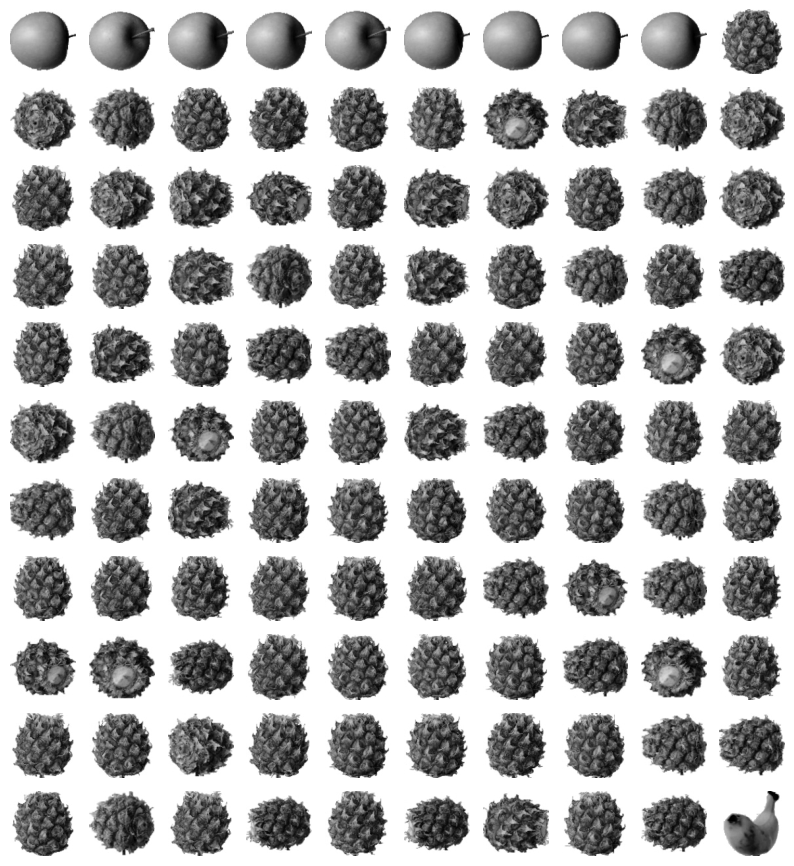

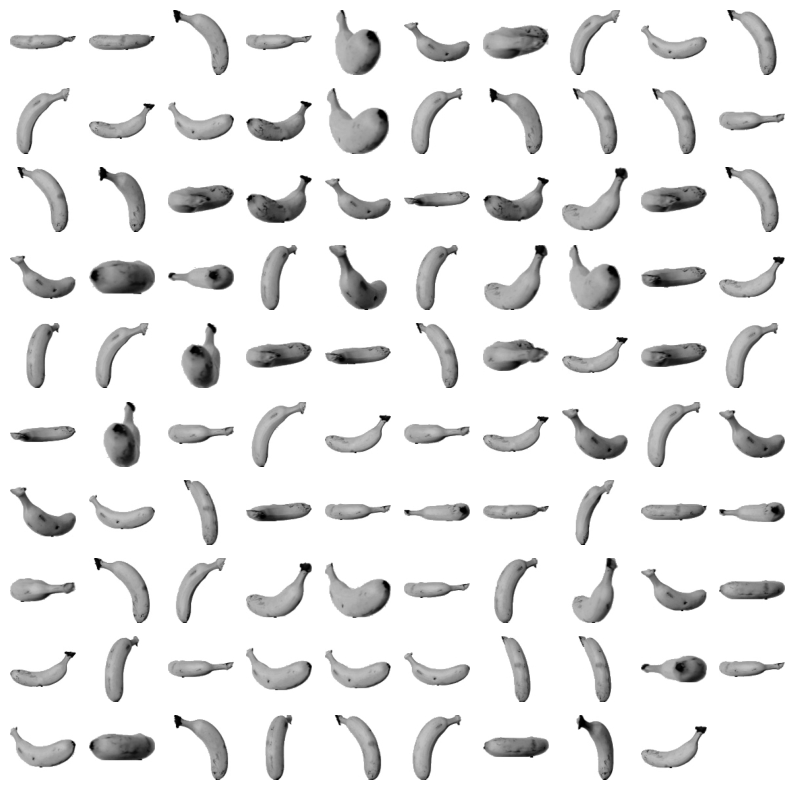

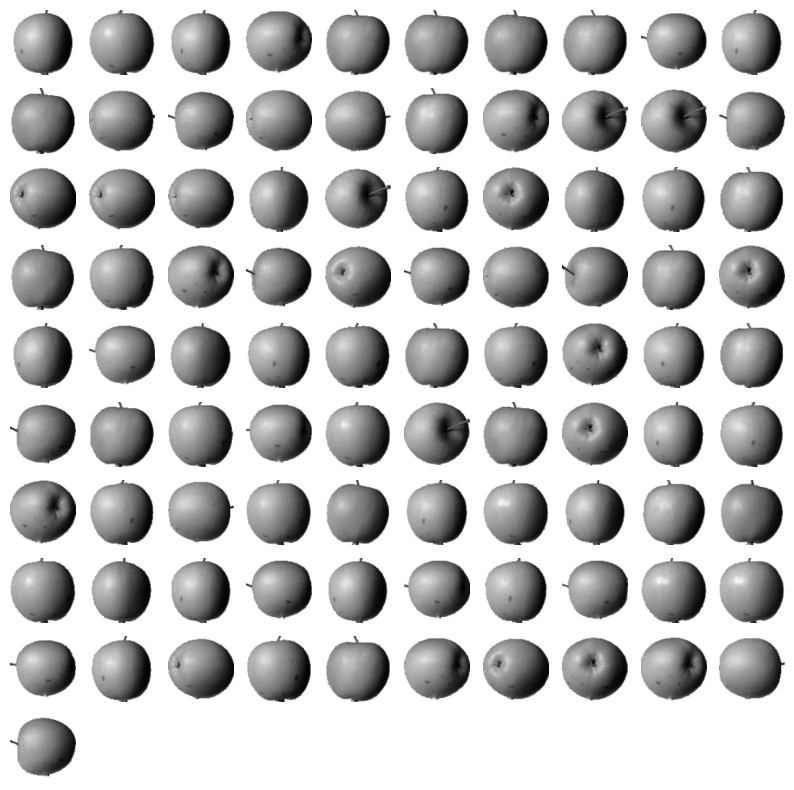

In [44]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

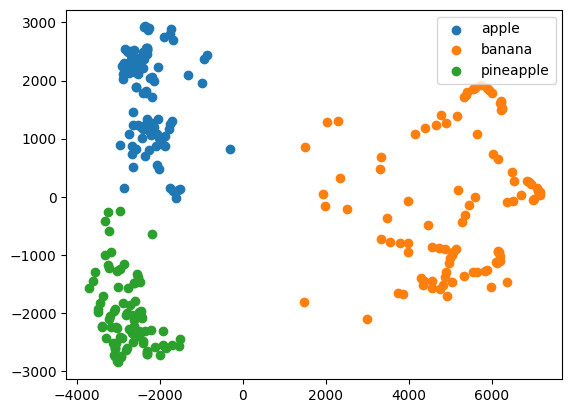

In [58]:
# 몇 개가 섞여있지만 성능 goood

# 훈련 데이터의 차원을 줄임으로 또 다른 장점은 시각화
# 3개 이하로 차원을 줄이면 화면에 출력하기 쉬움

for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

In [ ]:
# 사과와 파인애플 클러스터의 경계가 가깝게 붙어있어 샘플 몇 개가 혼동을 일으키는 것..!